<a href="https://colab.research.google.com/github/LBMH-lang/LBMH/blob/master/B%C3%A0i_t%E1%BA%ADp_x%C3%A2y_d%E1%BB%B1ng_m%C3%B4_h%C3%ACnh_h%E1%BB%93i_quy_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn

# **Bài 1:** Hãy trình bày cách đọc 1 tập dữ liệu vào bộ nhớ (ví dụ: Iris). Yêu cầu giải thích bằng lời và triển khai bằng code sau đó.

Cài các thư viện cần thiết

In [2]:
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import datasets

Tải datasets Iris:

- Tạo csv_url và chuyển tới nó url nơi có tập dữ liệu ' https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' .
- Tạo danh sách tên cột col_namesbằng cách sử dụng thông tin thuộc tính iris.
- Tạo một đối tượng DataFrame của gấu trúc được gọi là iris.

In [5]:
import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Sau khi tải tập datasets Iris, irisDataFrame kết quả có thể được xem bằng cách sử dụng các phương pháp DataFrame head() và tail() để xem 5 hàng đầu tiên và 5 hàng cuối cùng tương ứng. Các loại dữ liệu có thể được kiểm tra để đảm bảo chúng được suy ra chính xác bằng cách sử dụng dtypes. Sử dụng print chức năng này để in kết quả ra màn hình.

In [6]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# using the attribute information as the column names
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)

In [ ]:
print(iris.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# **Bài 2:** Từ tập dữ liệu trong bộ nhớ nêu trên, hãy tiến hành mô tả bằng các thông số thống kê mô tả và hình vẽ tương ứng.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
iris = datasets.load_iris()
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import statistics as sta
iris_X = iris.data
iris_y = iris.target

**Thống kê mô tả:**

Đối với mỗi thuộc tính định lượng, hãy tính giá trị trung bình, độ lệch chuẩn, giá trị nhỏ nhất và lớn nhất của tập dữ liệu.

In [7]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

sepal length:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal width:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
petal length:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
petal width:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


Đối với thuộc tính định tính (lớp), hãy đếm tần suất cho từng giá trị riêng biệt của tập dữ liệu.

In [13]:
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

Có thể hiển thị tóm tắt cho tất cả các thuộc tính đồng thời trong một bảng bằng cách sử dụng hàm description (). Nếu một thuộc tính là định lượng, nó sẽ hiển thị giá trị trung bình, độ lệch chuẩn và các lượng tử khác nhau (bao gồm giá trị nhỏ nhất, trung bình và tối đa). Nếu một thuộc tính là định tính, thì thuộc tính đó sẽ hiển thị số lượng giá trị duy nhất và giá trị hàng đầu (thường xuyên nhất) của tập dữ liệu.

In [ ]:
data.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Đối với thống kê đa biến, bạn có thể tính hiệp phương sai và mối tương quan giữa các cặp thuộc tính.

In [ ]:
print('Giá trị phương sai:')
data.cov()

Giá trị phương sai:


,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [ ]:
print('Giá trị tương quan:')
data.corr()

Giá trị tương quan:


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


**Trực quan hóa dữ liệu:**

Đầu tiên hiển thị biểu đồ cho thuộc tính sepal length

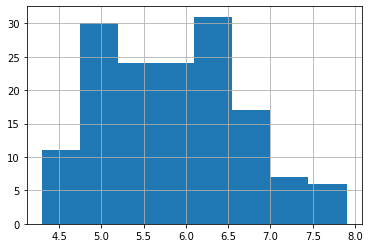

In [ ]:
%matplotlib inline

data['sepal length'].hist(bins=8)

Biểu đồ boxplot cũng có thể được sử dụng để hiển thị sự phân bố các giá trị cho từng thuộc tính.

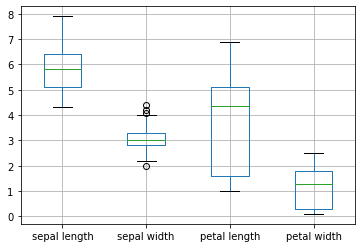

In [ ]:
data.boxplot()

 Đối với mỗi cặp thuộc tính, chúng ta có thể sử dụng scatter plot để hình dung sự phân bố chung của chúng.

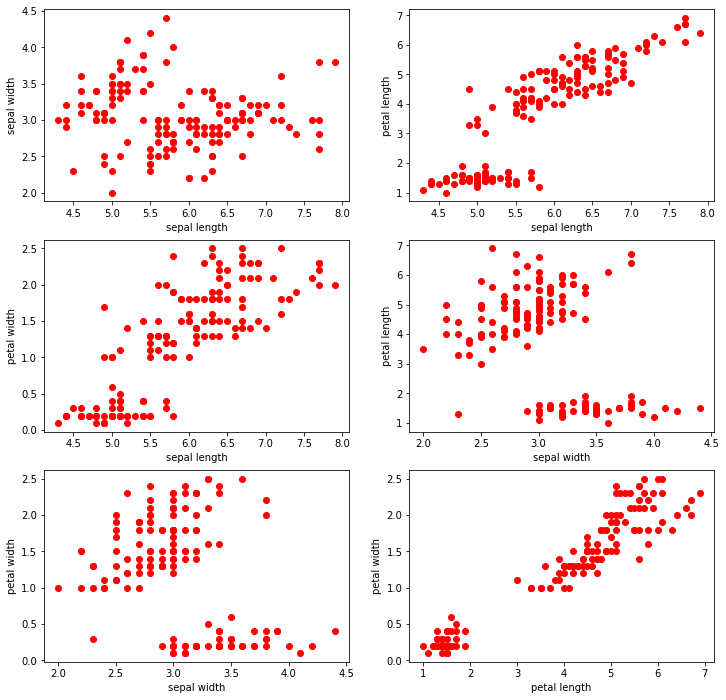

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

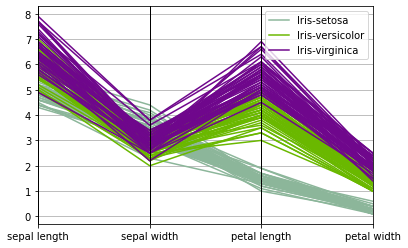

In [15]:
from  pandas.plotting  import parallel_coordinates 
%matplotlib inline 
parallel_coordinates( data , 'class' )


# **Bài 3:** Từ tập dữ liệu trong bộ nhớ nêu trên, hãy:
# - Trình bày cách xác định dữ liệu và xác định nhãn lớp. Code tương ứng
# - Trình bày cách chia tập dữ liệu ban đầu thành tập dữ liệu huấn luyện và tập dữ liệu kiểm thử. Code tương ứng.

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

print ('Number of classes: %d' %len(np.unique(iris_y)))
print ('Number of data points: %d' %len(iris_y))
X0 = iris_X[iris_y == 0,:]
print ('\nSamples from class 0:\n', X0[:5,:])

X1 = iris_X[iris_y == 1,:]
print ('\nSamples from class 1:\n', X1[:5,:])

X2 = iris_X[iris_y == 2,:]
print ('\nSamples from class 2:\n', X2[:5,:])

Number of classes: 3
Number of data points: 150

Samples from class 0:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Samples from class 1:
 [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]

Samples from class 2:
 [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=50)

print("Training size: %d" %len(y_train))
print("Test size    : %d" %len(y_test))

Training size: 100
Test size    : 50


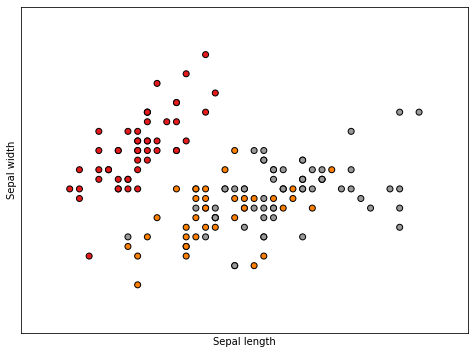

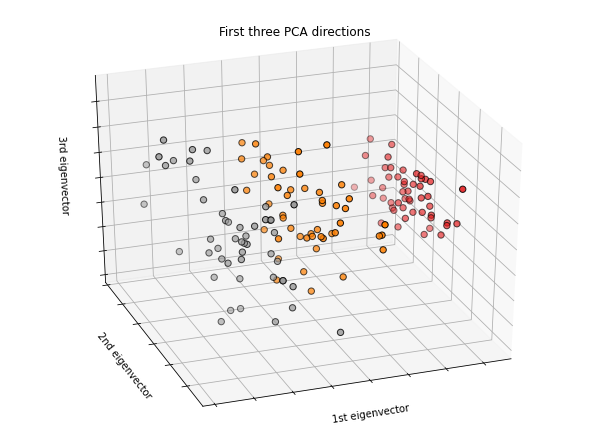

In [ ]:

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# **Bài 4:** Hãy trình bày lý thuyết về phương pháp 10-fold cross validation và code minh họa

Cross validation là một kỹ thuật lấy mẫu để đánh giá mô hình học máy trong trường hợp dữ liệu không được dồi dào cho lắm.

Tham số quan trọng trong kỹ thuật này là k, đại diện cho số nhóm mà dữ liệu sẽ được chia ra. Vì lý do đó, nó được mang tên k-fold cross-validation. Khi giá trị của k được lựa chọn, người ta sử dụng trực tiếp giá trị đó trong tên của phương pháp đánh giá. Ví dụ với k=10, phương pháp sẽ mang tên 10-fold Cross validation. 

Kỹ thuật này thường bao gồm các bước như sau:

1. Xáo trộn dataset một cách ngẫu nhiên
2. Chia dataset thành k nhóm
3. Với mỗi nhóm:
- Sử dụng nhóm hiện tại để đánh giá hiệu quả mô hình
- Các nhóm còn lại được sử dụng để huấn luyện mô hình
- Huấn luyện mô hình
- Đánh giá và sau đó hủy mô hình
- Tổng hợp hiệu quả của mô hình dựa từ các số liệu đánh giá

- Giá trị k là thông số quan trọng để có thể đánh giá chính xác mô hình

- Giá trị k=10 là một cấu hình rất phổ biến. Bạn nên sử dụng giá trị này nếu như gặp khó khăn để lựa chọn một giá trị thích hợp cho bài toán của bạn. Ngoài ra, bạn cũng nên chọn giá trị của k sao cho có thể chia đều các mẫu vào các nhóm. Thư viện scikit-learn cung cấp các cài đặt đầy đủ của cross-validation. 

In [ ]:
from numpy import array
from sklearn.model_selection import KFold
# data sample
data2 = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])
# prepare cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
for train, test in kfold.split(data2):
	print('train: %s, test: %s' % (data2[train], data2[test]))

train: [0.1 0.2 0.3 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.8 1.9 2. ], test: [0.4 1.7]
train: [0.1 0.2 0.3 0.4 0.5 0.6 0.8 0.9 1.  1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ], test: [0.7 1.1]
train: [0.1 0.2 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.6 1.7 1.8 1.9 2. ], test: [0.3 1.5]
train: [0.1 0.2 0.3 0.4 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9 2. ], test: [0.5 1.8]
train: [0.1 0.3 0.4 0.5 0.6 0.7 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ], test: [0.2 0.8]
train: [0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.5 1.6 1.7 1.8 1.9 2. ], test: [0.1 1.4]
train: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8], test: [1.9 2. ]
train: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.1 1.2 1.3 1.4 1.5 1.7 1.8 1.9 2. ], test: [1.  1.6]
train: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 1.  1.1 1.2 1.4 1.5 1.6 1.7 1.8 1.9 2. ], test: [0.9 1.3]
train: [0.1 0.2 0.3 0.4 0.5 0.7 0.8 0.9 1.  1.1 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ], test: [0.6 1.2]


>LogisticRegression: ideal=0.840, cv=0.850
>RidgeClassifier: ideal=0.830, cv=0.830
>SGDClassifier: ideal=0.760, cv=0.790
>PassiveAggressiveClassifier: ideal=0.820, cv=0.810
>KNeighborsClassifier: ideal=0.760, cv=0.770
>DecisionTreeClassifier: ideal=0.740, cv=0.690
>ExtraTreeClassifier: ideal=0.610, cv=0.710
>LinearSVC: ideal=0.830, cv=0.860
>SVC: ideal=0.900, cv=0.880
>GaussianNB: ideal=0.730, cv=0.720
>AdaBoostClassifier: ideal=0.740, cv=0.740
>BaggingClassifier: ideal=0.720, cv=0.730
>RandomForestClassifier: ideal=0.820, cv=0.780
>ExtraTreesClassifier: ideal=0.860, cv=0.800
>GaussianProcessClassifier: ideal=0.790, cv=0.760
>GradientBoostingClassifier: ideal=0.820, cv=0.820
>LinearDiscriminantAnalysis: ideal=0.830, cv=0.830
>QuadraticDiscriminantAnalysis: ideal=0.860, cv=0.700
Correlation: 0.680


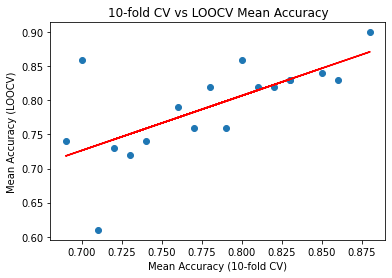

In [ ]:
#Cài đặt các thư viện cần thiết
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Tạo dataset
def get_dataset(n_samples=100):
	X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y
 
# Lấy danh sách các mô hình để đánh giá
def get_models():
	models = list()
	models.append(LogisticRegression())
	models.append(RidgeClassifier())
	models.append(SGDClassifier())
	models.append(PassiveAggressiveClassifier())
	models.append(KNeighborsClassifier())
	models.append(DecisionTreeClassifier())
	models.append(ExtraTreeClassifier())
	models.append(LinearSVC())
	models.append(SVC())
	models.append(GaussianNB())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier())
	models.append(RandomForestClassifier())
	models.append(ExtraTreesClassifier())
	models.append(GaussianProcessClassifier())
	models.append(GradientBoostingClassifier())
	models.append(LinearDiscriminantAnalysis())
	models.append(QuadraticDiscriminantAnalysis())
	return models

# Đánh giá mô hình bằng cách sử dụng một điều kiện test nhất định
def evaluate_model(cv, model):
	# Lấy dataset
	X, y = get_dataset()
	# Đánh giá mô hình
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores)
 
# Xác định các điều kiện test
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# Lấy danh sách các mô hình để xem xét
models = get_models()
# Thu được kết quả
ideal_results, cv_results = list(), list()
# Đánh giá từng mô hình
for model in models:
	# Đánh giá mô hình bằng cách sử dụng từng điều kiện test
	cv_mean = evaluate_model(cv, model)
	ideal_mean = evaluate_model(ideal_cv, model)
	# Kiểm tra kết quả không hợp lệ
	if isnan(cv_mean) or isnan(ideal_mean):
		continue
	# Lưu trữ kết quả
	cv_results.append(cv_mean)
	ideal_results.append(ideal_mean)
	# Tóm tắt tiến độ
	print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))
# Tính toán mối tương quan giữa mỗi điều kiện test
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# Biểu đồ scatter plot của kết quả
pyplot.scatter(cv_results, ideal_results)
# Vẽ dòng phù hợp 
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# Biểu đồ label của kết quả
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# Trình chiếu biểu đồ
pyplot.show()

# **Bài 5:** Hãy trình bày lý thuyết về các chủ điểm sau:
# - Bias là gì?
# - Overfitting là gì?
# - RMSE là gì?
# - Precision là gì?

- Bias: nghĩa là độ lệch, biểu thị sự chênh lệch giữa giá trị trung bình mà mô hình dự đoán và giá trị thực tế của dữ liệu.

- Overfitting là hiện tượng khi mô hình xây dựng thể hiện được chi tiết bộ dữ liệu huấn luyện. Điều này có nghĩa là cả dữ liệu nhiễu, hoặc dữ liệu bất thường trong tập huấn luyện đều được chọn và học để đưa ra quy luật mô hình.

- Root-Mean-Square Error ( RMSE ) là một biện pháp thường được sử dụng trong những khác biệt giữa các giá trị (mẫu hoặc các giá trị dân) được dự đoán bởi một mô hình hay một ước lượng và các giá trị quan sát được. RMSE đại diện cho căn bậc hai của thời điểm mẫu thứ hai về sự khác biệt giữa các giá trị dự đoán và giá trị quan sát hoặc giá trị trung bình bậc hai của những khác biệt này.

- Xét bài toán phân loại nhị phân trong hình dưới. Ta cũng coi một trong hai lớp là positive, lớp còn lại là negative.
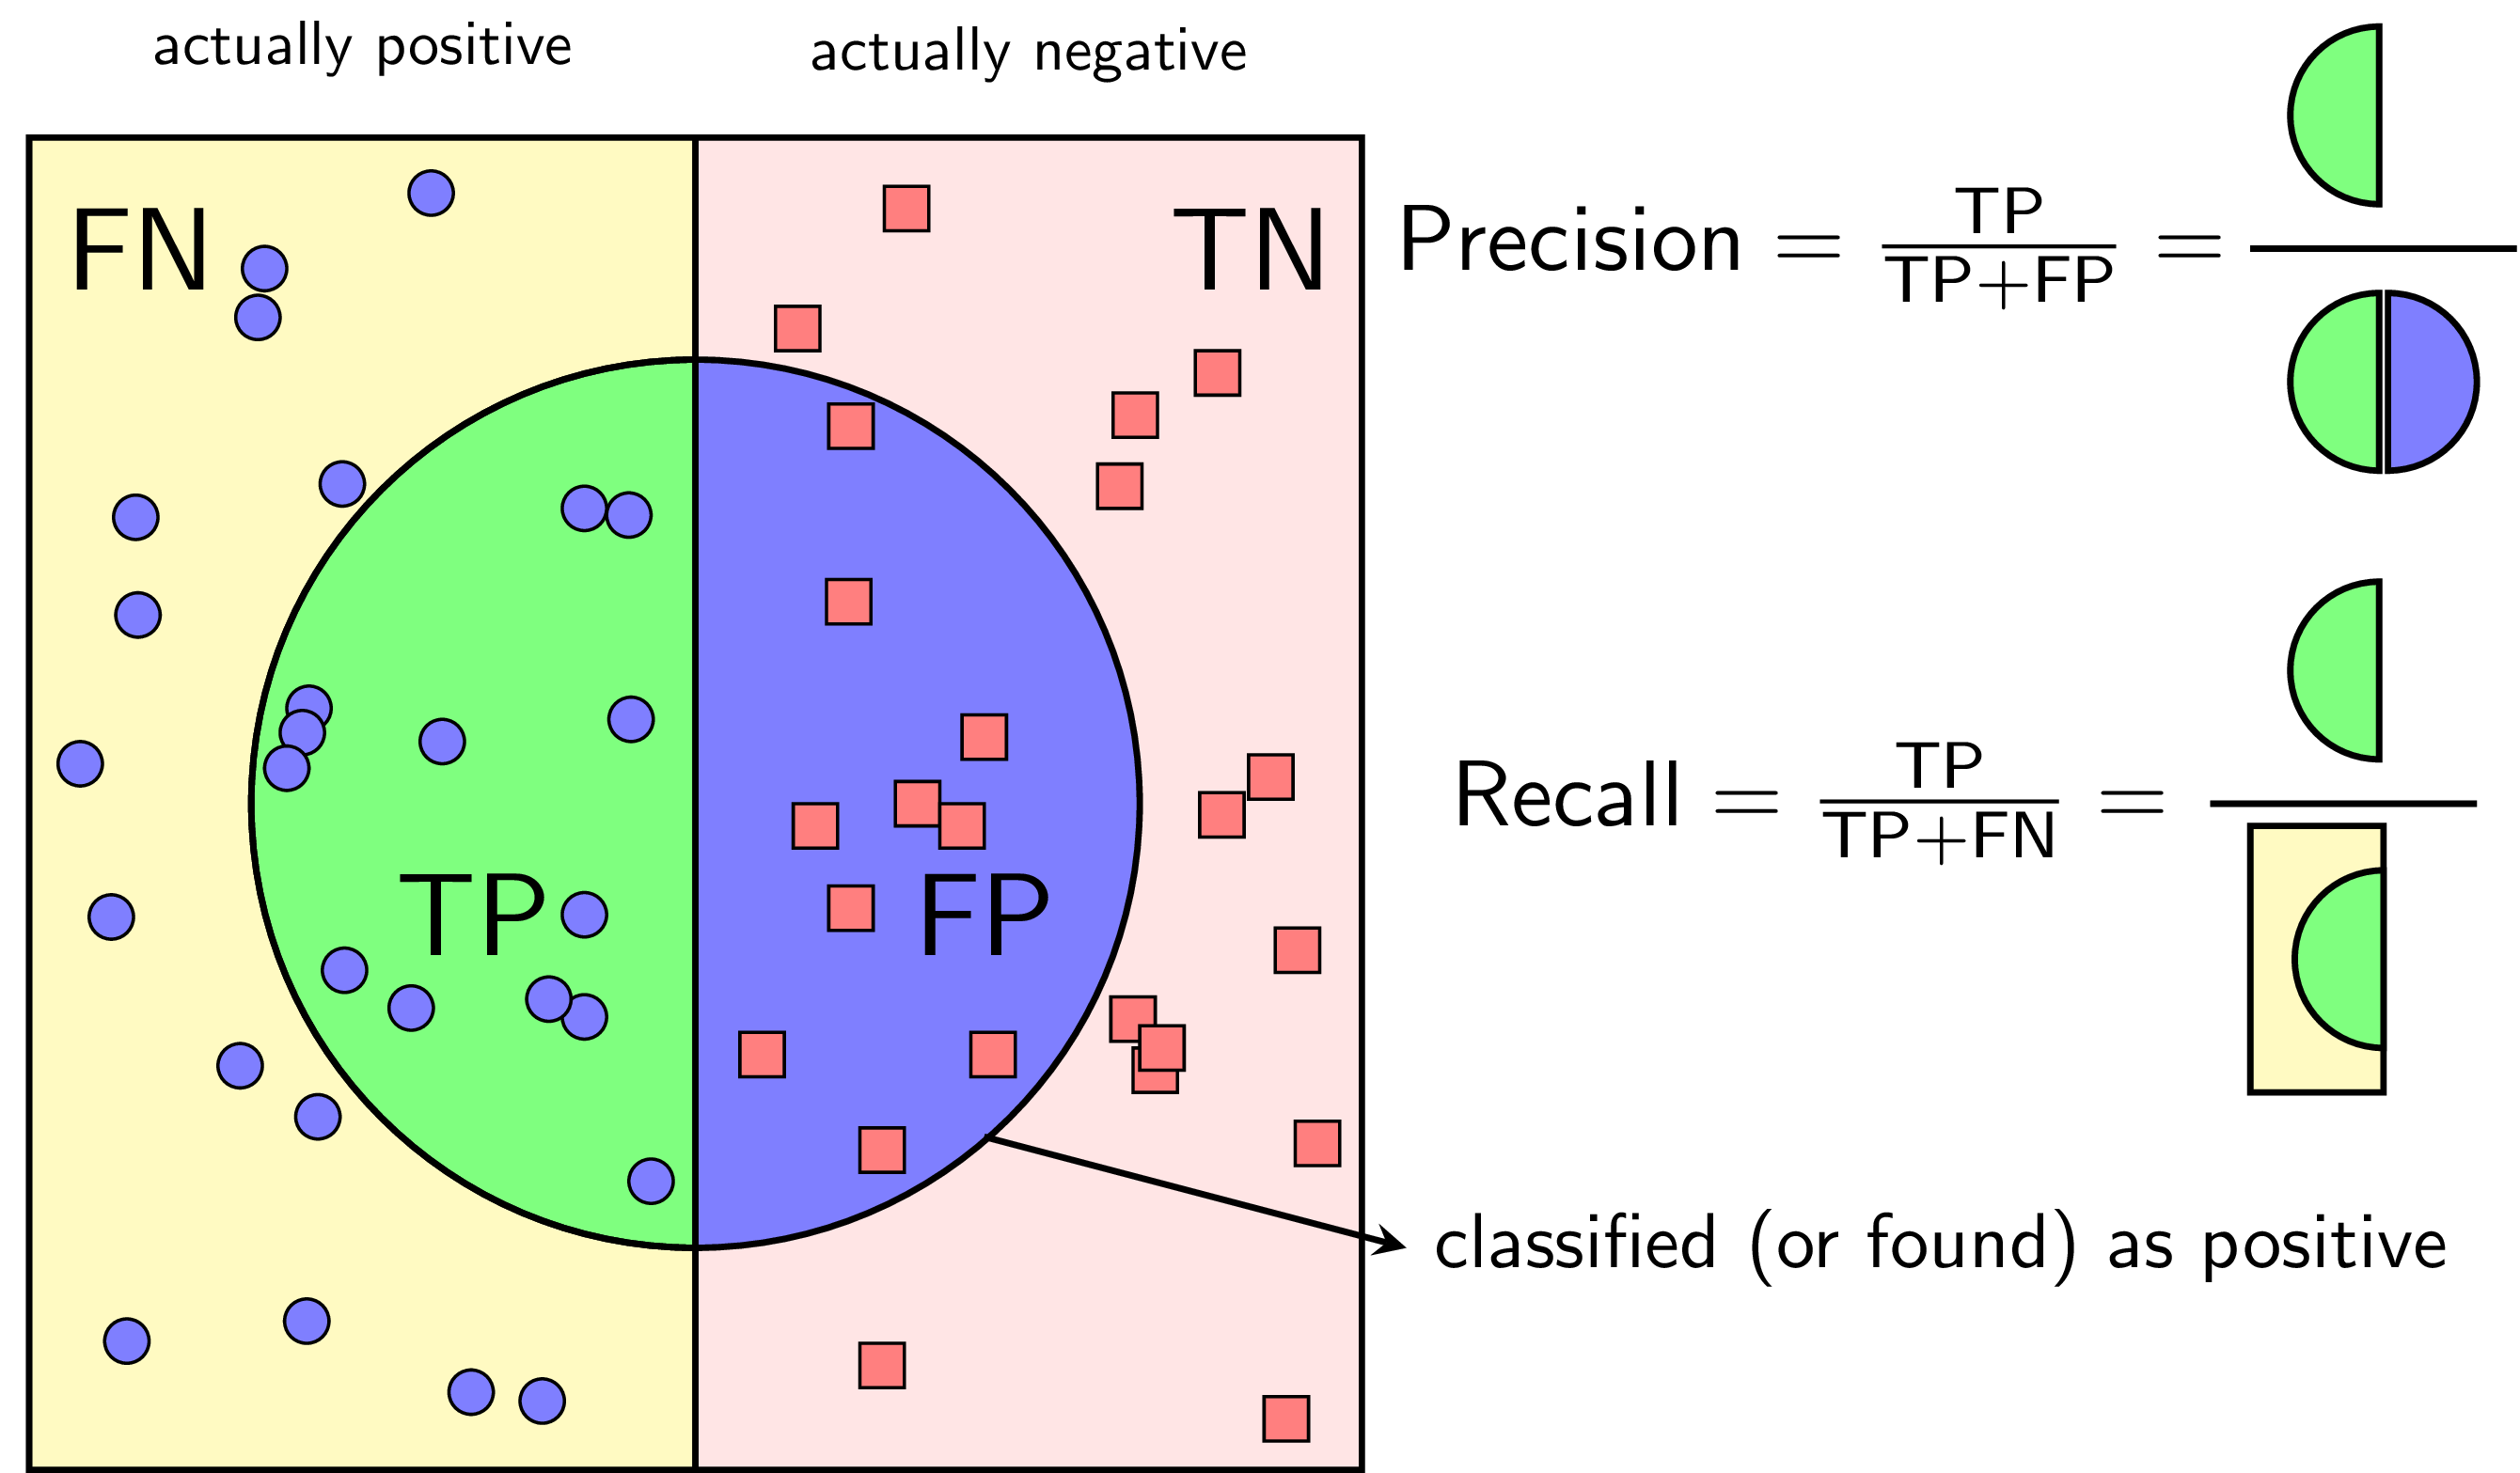
Với một cách xác định một lớp là positive, Precision được định nghĩa là tỉ lệ số điểm true positive trong số những điểm được phân loại là positive (TP + FP).

# **Bài 6:** Hãy trình bày phương pháp đánh giá mô hình bằng cách sử dụng tập dữ liệu kiểm thử (test dataset) và code tương ứng

Phương pháp đánh giá mô hình giúp chúng ta lựa chọn được mô hình phù hợp nhất đối với bài toán của mình, bao gồm các thành phần:
- Accuracy(Sự chính xác)
- Confusion matrix(Ma trận hỗn tạp)
- Precision(Độ chính xác)
- Recall(Gợi lại)
- F-Score

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#Drop id column

X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values
#Chia mảng thành các tập hợp con test và train ngẫu nhiên
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print("\n30% test data:")
print(X_test)
print(y_test)



30% test data:
[[6.7 3.1 4.7 1.5]
 [5.8 2.7 5.1 1.9]
 [4.9 3.1 1.5 0.1]
 [6.8 3.2 5.9 2.3]
 [7.2 3.6 6.1 2.5]
 [4.9 2.5 4.5 1.7]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [5.6 3.  4.5 1.5]
 [6.4 3.1 5.5 1.8]
 [5.7 3.8 1.7 0.3]
 [5.  3.  1.6 0.2]
 [5.1 3.5 1.4 0.3]
 [5.6 2.9 3.6 1.3]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.5 0.3]
 [5.1 3.8 1.6 0.2]
 [6.  2.9 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [7.1 3.  5.9 2.1]
 [6.4 2.8 5.6 2.2]
 [6.5 3.  5.2 2. ]
 [7.7 2.6 6.9 2.3]
 [7.  3.2 4.7 1.4]
 [6.  3.4 4.5 1.6]
 [5.8 2.7 3.9 1.2]
 [6.3 2.3 4.4 1.3]
 [6.4 3.2 5.3 2.3]
 [6.6 3.  4.4 1.4]
 [5.8 2.7 4.1 1. ]
 [5.9 3.  5.1 1.8]
 [6.5 3.  5.8 2.2]
 [6.3 3.3 4.7 1.6]
 [6.1 2.9 4.7 1.4]
 [4.6 3.4 1.4 0.3]
 [6.6 2.9 4.6 1.3]
 [4.6 3.2 1.4 0.2]
 [7.2 3.  5.8 1.6]
 [7.3 2.9 6.3 1.8]
 [6.3 2.7 4.9 1.8]
 [6.8 3.  5.5 2.1]
 [7.6 3.  6.6 2.1]
 [6.  2.2 4.  1. ]
 [5.9 3.  4.2 1.5]
 [5.2 2.7 3.9 1.4]]
['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virgin

In [ ]:
# Training a binary classifier using Random Forest Algorithm with default hyperparameters
classifier = RandomForestClassifier(random_state=18)
classifier.fit(X_train, y_train)

# Here X_test, y_test are the test data points
predictions = classifier.predict(X_test)

Accuracy là tỷ lệ phần trăm dự đoán đúng cho dữ liệu thử nghiệm. Nó có thể được tính toán dễ dàng bằng cách chia số lần dự đoán đúng cho tổng số lần dự đoán.

In [ ]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.9333333333333333


Confusion matrix là ma trận vuông N chiều, trong đó N đại diện cho tổng số lớp hoặc danh mục mục tiêu. Confusion matrix có thể được sử dụng để đánh giá một bộ phân loại bất cứ khi nào tập dữ liệu bị mất cân bằng.

[[ 5  6  4]
 [ 2  3 10]
 [ 3  9  3]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


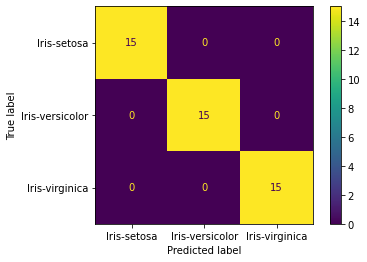

In [ ]:
# importing all necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, predictions))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

Precision là phần nhỏ của các ví dụ có liên quan (tích cực thực sự) trong số tất cả các ví dụ được dự đoán là thuộc một lớp nhất định.

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.9777777777777777


Recall là phần nhỏ của các ví dụ được dự đoán thuộc về một lớp so với tất cả các ví dụ thực sự thuộc về lớp đó.

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

F1-Score được sử dụng khi cả độ chính xác và thu hồi đều quan trọng đối với trường hợp sử dụng. Điểm F1 là trung bình hài hòa của độ chính xác và thu hồi.

In [ ]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

# **Bài 7:** Bạn hãy lựa chọn 1 tập dữ liệu phù hợp với bài toán hồi quy tuyến tính và xây dựng mô hình hồi quy tuyến tính theo từng bước (kèm với mô tả của từng bước)

- **Bước 1:** Tải dữ liệu

Cài đặt các thư viện cần thiết, rồi từ đó load tập dữ liệu Iris

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn import datasets

In [ ]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- **Bước 2:** Mô tả dữ liệu

Tập dữ liệu Iris đưa ra các phép đo tính bằng cm của các biến chiều dài và chiều rộng của đài hoa và chiều dài và chiều rộng của cánh hoa , tương ứng đối với 50 bông hoa từ 3 loài trong số 3 loài iris. Các loài là Iris setosa , versicolor , và virginica .

- **Bước 3:** Phân chia train – test (tỉ lệ 70% -30%)

Viết code Python bằng Scikit-learning để chia tập Iris dataset thành 70% dữ liệu train và 30% dữ liệu test.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#Drop id column

X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values
#Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print("\n70% train data:")
print(X_train)
print(y_train)
print("\n30% test data:")
print(X_test)
print(y_test)

#Create KNN Classifier
#Number of neighbors to use by default for kneighbors queries.
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
print("Response for test dataset:")
y_pred = knn.predict(X_test)
print(y_pred)


70% train data:
[[5.7 2.8 4.1 1.3]
 [6.1 2.8 4.  1.3]
 [6.7 3.  5.  1.7]
 [5.4 3.9 1.7 0.4]
 [6.9 3.1 5.4 2.1]
 [6.8 3.  5.5 2.1]
 [5.  2.  3.5 1. ]
 [5.4 3.4 1.5 0.4]
 [6.  2.2 5.  1.5]
 [7.1 3.  5.9 2.1]
 [6.5 2.8 4.6 1.5]
 [5.4 3.4 1.7 0.2]
 [7.7 3.  6.1 2.3]
 [5.4 3.  4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [5.2 2.7 3.9 1.4]
 [5.1 3.8 1.9 0.4]
 [6.  2.9 4.5 1.5]
 [5.  3.4 1.6 0.4]
 [5.  3.2 1.2 0.2]
 [5.8 2.7 3.9 1.2]
 [5.7 2.8 4.5 1.3]
 [7.4 2.8 6.1 1.9]
 [6.3 2.8 5.1 1.5]
 [4.9 3.  1.4 0.2]
 [6.3 3.3 4.7 1.6]
 [6.1 2.9 4.7 1.4]
 [5.  3.5 1.3 0.3]
 [5.4 3.9 1.3 0.4]
 [4.6 3.1 1.5 0.2]
 [5.8 2.7 4.1 1. ]
 [6.  3.  4.8 1.8]
 [5.1 3.8 1.6 0.2]
 [6.4 3.2 5.3 2.3]
 [6.4 2.9 4.3 1.3]
 [6.4 2.8 5.6 2.1]
 [6.3 2.5 4.9 1.5]
 [7.2 3.2 6.  1.8]
 [6.  3.4 4.5 1.6]
 [4.7 3.2 1.3 0.2]
 [6.7 3.1 4.7 1.5]
 [5.8 2.7 5.1 1.9]
 [5.1 3.3 1.7 0.5]
 [6.6 2.9 4.6 1.3]
 [6.9 3.1 5.1 2.3]
 [7.9 3.8 6.4 2. ]
 [6.2 2.2 4.5 1.5]
 [4.8 3.  1.4 0.1]
 [7.3 2.9 6.3 1.8]
 [5.9 3.  5.1 1.8]
 [4.6 3.6 1.  0.2]
 [6.7 3.3 5.7 

- **Bước 4:** Huấn luyện mô hình với train set (10-fold cross validation)
Từ thư viện sklearn import KFold

- Thư viện máy học Python scikit-learning cung cấp k-fold cross validation thông qua lớp RepeatedKFold .

- Các tham số chính là số lần gấp ( n_splits ), là “ k ” trong cross validation và số lần lặp lại ( n_repeats ).

- Giá trị mặc định tốt cho k là k = 10.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

from sklearn import tree
from sklearn import naive_bayes
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


#Read data
data.columns = ["Calyx length","Calyx width","Petal length","petal width","category"]



k = 10
kf = KFold(n_splits=k, shuffle=True)

def eval_model(model_name,model):
    accuracies = []
    i=0
    for train_index, test_index in kf.split(data): #split
        x_train, x_test = X.loc[train_index] ,X.loc[test_index]
        y_train, y_test = Y.loc[train_index] ,Y.loc[test_index]
        
        model.fit(x_train,y_train) #train
        y_predict = model.predict(x_test) #Forecast
        
        accuracy = accuracy_score(y_pred=y_predict,y_true=y_test) #accuracy
        accuracies.append(accuracy)
        i+=1
        print('The first{}round: {}'.format(i,accuracy))
        
    print(model_name+"Model accuracy: ",np.mean(accuracies))
    
    
models={
        'decision tree':lambda:tree.DecisionTreeClassifier(),
        'random forest':lambda:RandomForestClassifier(n_estimators=100),
        'naive bayes':lambda:naive_bayes.GaussianNB(),
        'svm':lambda:svm.SVC(gamma='scale'),
        'GBDT':lambda:GradientBoostingClassifier(),
        'MLP':lambda:MLPClassifier(max_iter=1000),        
        }


for name,m in models.items():
    eval_model(name,m())


The first1round: 1.0
The first2round: 0.8666666666666667
The first3round: 1.0
The first4round: 0.9333333333333333
The first5round: 0.9333333333333333
The first6round: 0.9333333333333333
The first7round: 1.0
The first8round: 0.9333333333333333
The first9round: 1.0
The first10round: 1.0
decision treeModel accuracy:  0.96
The first1round: 0.9333333333333333
The first2round: 0.9333333333333333
The first3round: 1.0
The first4round: 1.0
The first5round: 1.0
The first6round: 1.0
The first7round: 0.8666666666666667
The first8round: 1.0
The first9round: 0.9333333333333333
The first10round: 0.9333333333333333
random forestModel accuracy:  0.96
The first1round: 0.9333333333333333
The first2round: 0.9333333333333333
The first3round: 0.9333333333333333
The first4round: 1.0
The first5round: 0.8666666666666667
The first6round: 1.0
The first7round: 0.8666666666666667
The first8round: 1.0
The first9round: 1.0
The first10round: 0.9333333333333333
naive bayesModel accuracy:  0.9466666666666667
The first1

- **Bước 5:** Kiểm thử mô hình với test set
 
 Dự đoán phản hồi cho test dataset (SepalLength Cm, SepalWidthCm, PetalLength, PetalWidth Cm) bằng cách sử dụng  thuật toán K Nearest Neighbor.

In [ ]:
print("\n30% test data:")
print(X_test)
print(y_test)
#Number of neighbors to use by default for kneighbors queries.
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
print("Response for test dataset:")
y_pred = knn.predict(X_test)
print(y_pred)


30% test data:
     Calyx length  Calyx width  Petal length  petal width
14            5.8          4.0           1.2          0.2
98            5.1          2.5           3.0          1.1
75            6.6          3.0           4.4          1.4
16            5.4          3.9           1.3          0.4
131           7.9          3.8           6.4          2.0
56            6.3          3.3           4.7          1.6
141           6.9          3.1           5.1          2.3
44            5.1          3.8           1.9          0.4
29            4.7          3.2           1.6          0.2
120           6.9          3.2           5.7          2.3
94            5.6          2.7           4.2          1.3
5             5.4          3.9           1.7          0.4
102           7.1          3.0           5.9          2.1
51            6.4          3.2           4.5          1.5
78            6.0          2.9           4.5          1.5
42            4.4          3.2           1.3          0.

- **Bước 6:** Trình bày kết quả và nhận xét
 Chúng ta sẽ chạy hồi quy tuyến tính.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=50)

print("Training size: %d" %len(y_train))
print("Test size    : %d" %len(y_test))

Training size: 100
Test size    : 50


Coefficients:  [-0.12740387  0.03352481  0.2581965   0.57327081]
Variance score: 0.9131571637791617


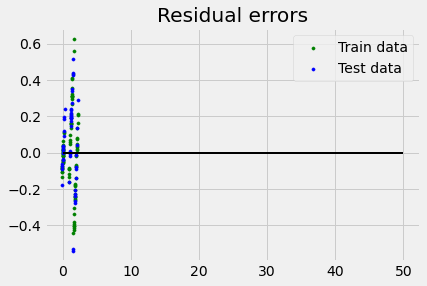

In [ ]:
# create linear regression object
reg = LinearRegression(fit_intercept=False)
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

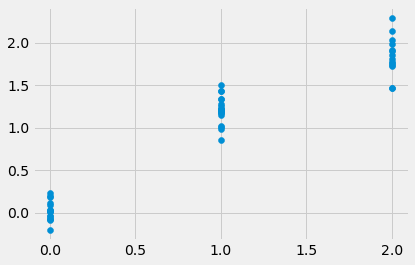

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

Y_pred = lm.predict(X_test)

plt.scatter(y_test, Y_pred)

Để kiểm tra mức độ lỗi của một mô hình, chúng ta có thể sử dụng Mean Squared Error. Đây là một trong các phương pháp để đo trung bình của ô vuông của sai số. Về cơ bản, nó sẽ kiểm tra sự khác biệt giữa giá trị thực tế và giá trị dự đoán. Để sử dụng nó, chúng ta có thể sử dụng hàm bình phương trung bình sai số của scikit-learn bằng cách chạy đoạn mã này

In [ ]:
mse = sklearn.metrics.mean_squared_error(y_test, Y_pred)
print(mse)

0.05150532499372993


Kết quả:
- Hệ số mô hình: [-0.12740387  0.03352481  0.2581965   0.57327081]
- Điểm phương sai: 0.91

- Mức độ chính xác của mô hình là 95%
- Mức độ sai số là 5%

Nhận xét: Mô hình Linear Regression hoạt động tương đối tốt với mức độ sai số nhỏ và độ chính xác cao.

# **Bài 9:** Bạn hãy lựa chọn 1tập dữ liệu phù hợp với bài toán hồi quy logistic và xây dựng mô hình hồi quy logistic theo từng bước (kèm với mô tả của từng bước)

- **Bước 1:** Tải dữ liệu


Tải tập dữ liệu chứa thông tin của người dùng từ cơ sở dữ liệu công ty.

Cài các thư viện cần thiết.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('User_Data.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Để dự đoán liệu người dùng có mua sản phẩm hay không, người ta cần tìm hiểu mối quan hệ giữa Tuổi và Mức lương ước tính. Ở đây ID người dùng và Giới tính không phải là yếu tố quan trọng để tìm ra điều này. 

In [ ]:
# input
x = dataset.iloc[:, [2, 3]].values

# output
y = dataset.iloc[:, 4].values


- **Bước 2:** Mô tả dữ liệu

Nó chứa thông tin về UserID, Giới tính, Tuổi, Ước tính giá trị, Đã mua. Chúng tôi đang sử dụng tập dữ liệu này để dự đoán rằng người dùng có mua sản phẩm mới ra mắt của công ty hay không. 
Dữ liệu - User_Data 

- **Bước 3:** Phân chia train – test (tỉ lệ 70% -30%)

Tách tập dữ liệu để train và test. 70% dữ liệu được sử dụng để train mô hình và 30% dữ liệu được sử dụng để test hiệu suất của mô hình

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
		x, y, test_size = 0.30, random_state = 0)


Bây giờ thực hiện chia tỷ lệ tính năng ở đây vì các giá trị Độ tuổi và Mức lương ước tính nằm trong các phạm vi khác nhau. Nếu chúng ta không chia tỷ lệ các tính năng thì tính năng Mức lương ước tính sẽ chiếm ưu thế trong tính năng Độ tuổi khi mô hình tìm thấy nearest neighbor với điểm dữ liệu trong không gian dữ liệu. 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])


[[-1.1631724  -1.5849703 ]
 [ 2.17018137  0.93098672]
 [ 0.0133054   1.22017719]
 [ 0.20938504  1.07558195]
 [ 0.40546467 -0.48604654]
 [-0.28081405 -0.31253226]
 [ 0.99370357 -0.8330751 ]
 [ 0.99370357  1.8563962 ]
 [ 0.0133054   1.24909623]
 [-0.86905295  2.26126285]]


Ở đây một khi thấy rằng các giá trị của các tính năng Tuổi và Lương ước tính được ẩn và bây giờ ở đó từ -1 đến 1. Do đó, mỗi tính năng sẽ đóng góp như nhau trong việc đưa ra quyết định, tức là hoàn thiện giả thuyết. 
Cuối cùng, chúng tôi đang train mô hình hồi quy logistic của mình. 

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)


LogisticRegression(random_state=0)

Kiểm tra hiệu suất của mô hình - Ma trận hỗn tạp 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[74  5]
 [11 30]]


- **Bước 4:** Huấn luyện mô hình với train set (10-fold cross validation)

- Thư viện máy học Python scikit-learning cung cấp k-fold cross validation thông qua lớp RepeatedKFold .

- Các tham số chính là số lần gấp ( n_splits ), là “ k ” trong cross validation và số lần lặp lại ( n_repeats ).

- Giá trị mặc định tốt cho k là k = 10.

In [ ]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, xtrain, ytrain, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.632 (0.107)


- **Bước 5:** Kiểm thử mô hình với test set

Sau khi train mô hình, đã đến lúc sử dụng nó để dự đoán trên test dataset. 

In [ ]:
y_pred = classifier.predict(xtest)


In [ ]:
print("\n30% test data:")
print(xtest)
print(ytest)


30% test data:
[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000

- **Bước 6:** Trình bày kết quả và nhận xét

Tìm độ sai số:

In [ ]:
mse2 = sklearn.metrics.mean_squared_error(ytest, y_pred)
print(mse2)

0.3416666666666667


Kết quả: 
- Độ chính xác mô hình là 63%
- Độ sai số của mô hình là 34%

Nhận xét: Sau khi phân tích các thước đo hiệu suất - độ chính xác và ma trận hỗn tạp và biểu đồ, ta có thể nói rõ ràng rằng mô hình đang hoạt động khá tốt.

# **Bài 8:** Bạn hãy lựa chọn 1 tập dữ liệu phù hợp với bài toán hồi quy phi tuyến và xây dựng mô hình hồi quy phi tuyến theo từng bước (kèm với mô tả của từng bước)

- **Bước 1:** Tải dữ liệu

- Cài đặt các thư viện cần thiết
- Tải dataset 

In [ ]:
# downloading dataset
! wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

2022-03-23 13:47:06 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [ ]:
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


- **Bước 2:** Mô tả dữ liệu

Mô hình phi tuyến tính với điểm dữ liệu tương ứng với GDP của Trung Quốc từ năm 1960 đến năm 2014. Ta tải xuống tập dữ liệu có hai cột, cột đầu tiên: một năm từ 1960 đến 2014, cột thứ hai: Tổng thu nhập quốc nội hàng năm tương ứng của Trung Quốc tính bằng đô la Mỹ trong năm đó.

Vẽ dataset:

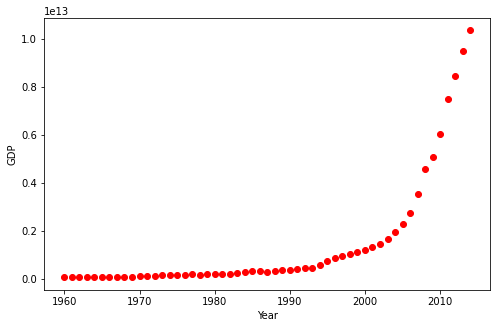

In [ ]:
plt.figure(figsize=(8,5))
x8_data, y8_data = (df["Year"].values, df["Value"].values)
plt.plot(x8_data, y8_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Theo biểu đồ, ta xác định rằng hàm logistic có thể là một xấp xỉ tốt, vì nó có đặc tính là bắt đầu với tốc độ tăng trưởng chậm, tăng trưởng nhanh ở giữa và sau đó giảm lại ở cuối; như minh họa bên dưới:

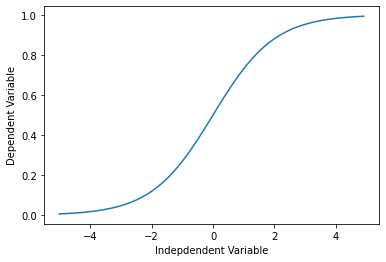

In [ ]:
X8 = np.arange(-5.0, 5.0, 0.1)
Y8 = 1.0 / (1.0 + np.exp(-X8))

plt.plot(X8,Y8) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Build mô hình

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y8 = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y8

Dòng sigmoid mẫu có thể phù hợp với dữ liệu:

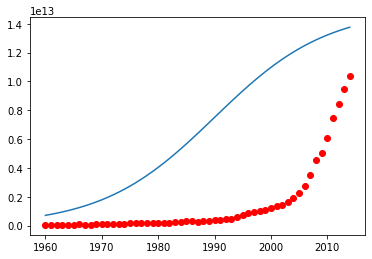

In [ ]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y8_pred = sigmoid(x8_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x8_data, Y8_pred*15000000000000.)
plt.plot(x8_data, y8_data, 'ro')

Chuẩn hóa x và y

In [ ]:
x8data  = x8_data / max ( x8_data ) 
y8data  = y8_data / max ( y8_data )

- **Bước 3:** Phân chia train – test (tỉ lệ 70% -30%)

Tách tập dữ liệu để train và test. 70% dữ liệu được sử dụng để train mô hình và 30% dữ liệu được sử dụng để test hiệu suất của mô hình

In [ ]:
from sklearn.model_selection import train_test_split

x8train, x8test, y8train, y8test = train_test_split(
		x8data, y8data, test_size = 0.30, random_state = 0)


- **Bước 4:** Huấn luyện mô hình với train set (10-fold cross validation)

- Thư viện máy học Python scikit-learning cung cấp k-fold cross validation thông qua lớp RepeatedKFold .

- Các tham số chính là số lần gấp ( n_splits ), là “ k ” trong cross validation và số lần lặp lại ( n_repeats ).

- Giá trị mặc định tốt cho k là k = 10.

In [ ]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, x8train, y8train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/l

- **Bước 5:** Kiểm thử mô hình với test set

Sau khi train mô hình, đã đến lúc sử dụng nó để dự đoán trên test dataset. 

In [ ]:
print("\n30% test data:")
print(x8test)
print(y8test)


30% test data:
[0.99553128 0.98957299 0.99304866 0.98609732 0.97864945 0.97418073
 0.98907646 0.99453823 0.99602781 0.98808342 0.97517378 0.97815293
 0.98709037 0.98411122 0.98857994 0.99751738 0.99155909]
[0.21908602 0.04276985 0.11639597 0.02885665 0.00951846 0.00450854
 0.04103727 0.15933902 0.26362418 0.03466722 0.00570384 0.00883705
 0.03000746 0.01965745 0.03683833 0.48860473 0.09253259]


- **Bước 6:** Trình bày kết quả và nhận xét

Tìm độ sai số:

In [ ]:
mse3 = sklearn.metrics.mean_squared_error(y8data, Y8_pred)
print(mse3)

0.14239383422872237


Kết quả: 
- Độ chính xác mô hình là 98%
- Độ sai số của mô hình là 2%

Nhận xét: Mô hình Non-Linear Regression hoạt động tương đối tốt vì có độ sai số thấp 